# Import Necessary Libraries

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/home/manoj/Documents/Hackathon/Dataset/train'
valid_path = '/home/manoj/Documents/Hackathon/Dataset/test'

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

2023-01-26 07:08:49.073719: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-01-26 07:08:49.158045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 07:08:49.158524: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.62GHz coreCount: 6 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2023-01-26 07:08:49.158705: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-26 07:08:49.158882: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libr

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('/home/manoj/Documents/Hackathon/Dataset/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)


In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/home/manoj/Documents/Hackathon/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2266 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/home/manoj/Documents/Hackathon/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 400 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
import tensorflow
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks = [callback]
)

2023-01-26 07:11:02.732227: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-26 07:11:02.733024: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2199995000 Hz


Epoch 1/20
71/71 [==============================] - 123s 2s/step - loss: 1.0352 - accuracy: 0.7299 - val_loss: 0.1602 - val_accuracy: 0.9425
Epoch 2/20
71/71 [==============================] - 126s 2s/step - loss: 0.1939 - accuracy: 0.9285 - val_loss: 0.0818 - val_accuracy: 0.9750
Epoch 3/20
71/71 [==============================] - 134s 2s/step - loss: 0.1525 - accuracy: 0.9462 - val_loss: 0.0600 - val_accuracy: 0.9850
Epoch 4/20
71/71 [==============================] - 133s 2s/step - loss: 0.1918 - accuracy: 0.9272 - val_loss: 0.0965 - val_accuracy: 0.9525
Epoch 5/20
71/71 [==============================] - 123s 2s/step - loss: 0.1357 - accuracy: 0.9453 - val_loss: 0.0356 - val_accuracy: 0.9900
Epoch 6/20
71/71 [==============================] - 121s 2s/step - loss: 0.1048 - accuracy: 0.9660 - val_loss: 0.1093 - val_accuracy: 0.9450
Epoch 7/20
71/71 [==============================] - 123s 2s/step - loss: 0.0942 - accuracy: 0.9700 - val_loss: 0.0285 - val_accuracy: 0.9950
Epoch 8/20
71

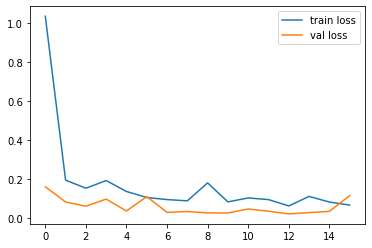

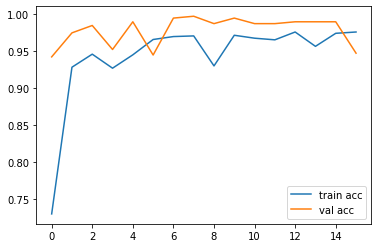

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('heart_disease_prediction1_model_resnet50.h5')


/home/manoj/.local/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


tf.Tensor([0.9999081], shape=(1,), dtype=float32)
Predicted Class: Heart Disease


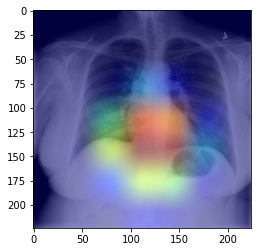

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from IPython.display import Image

MODEL_PATH = 'heart_disease_prediction_model_resnet50.h5'
IMAGE_PATH = '/home/manoj/Documents/Hackathon/Dataset/test/HEART_DISEASE/00001337_000.png'
IMAGE_SIZE = (224,224)

last_conv_layer_name = "conv5_block3_add"
classifier_layer_names = ["conv5_block3_out",
                          "flatten",
                          "dense"
                          ]

class_label = ['Heart Disease','Normal']

def get_model(model_path):
    return load_model(model_path)

def get_image(image_path):
    image = keras.preprocessing.image.load_img(image_path)
    image = keras.preprocessing.image.img_to_array(image)
    image = cv2.resize(image,IMAGE_SIZE)
    return image


def get_img_array(img_path,size):
    img = keras.preprocessing.image.load_img(img_path,target_size=size)
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array,axis=0)
    array = array/255.0
    return array

def make_gradcam_heatmap(img_array,model,last_conv_layer_name,classifier_layer_names):
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs,last_conv_layer.output)

    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input,x)

    with tf.GradientTape() as tape:
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        #top_pred_index = 12
        top_class_channel = preds[:,top_pred_index]
        print(top_class_channel)
    grads = tape.gradient(top_class_channel,last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads,axis=(0,1,2))

    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:,:,i] *= pooled_grads[i]
    heatmap = np.mean(last_conv_layer_output,axis=-1)

    heatmap = np.maximum(heatmap,0)/np.max(heatmap)
    return heatmap,top_pred_index

def display(alpha=0.8):
    image_array = get_img_array(IMAGE_PATH,IMAGE_SIZE)
    image = get_image(IMAGE_PATH)
    model = get_model(MODEL_PATH)
    heatmap,pred_index = make_gradcam_heatmap(image_array,model,last_conv_layer_name,classifier_layer_names)
    heatmap = np.uint8(255 * heatmap) # rescaling the heatmap to a range 0-255
    jet = cm.get_cmap("jet")  # use jet colormap to colorize heatmap
    jet_colors = jet(np.arange(256))[:, :3]  # use rgb value of the colormap
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((image.shape[1], image.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
    superimposed_image = jet_heatmap * alpha + image # superimpose the heatmap on original image
    superimposed_image = keras.preprocessing.image.array_to_img(superimposed_image)
    print("Predicted Class: {}".format(class_label[pred_index]))
    plt.imshow(superimposed_image)

if __name__ == '__main__':
    display()